In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.Points import DivisionGames,DivisionSets,RallyParsing, RallyParsing
from utils.Visuals import GetCourt
import numpy as np
import os
import csv
import warnings
from sportypy.surfaces.tennis import ATPCourt, TennisCourt

In [66]:
StrokesDictionary = {
    '0' : 'Serve',
    '4' : 'Wide Serve',
    '5' : 'Body Serve',
    '6' : 'Down The T Serve',
    'f' : 'Forehand ',
    'b' : 'Backhand ',
    'r' : 'FH Slice',
    's' : 'BH Slice ',
    'v' : 'FH Volley ',
    'z' : 'BH Volley ',
    '1' : '1',
    '2' : '2',
    '3' : '3',
    '*' : 'Winner',
    '@' : 'Forced Error',
    '#' : 'Unforced Error',
    'o' :'standard overhead/smash',
    'p' :'backhand overhead/smash',
    'u' :'forehand drop shot',
    'y' :'backhand drop shot',
    'l' :'forehand lob',
    'm' :'backhand lob',
    'h' :'forehand half-volley',
    'i' :'backhand half-volley',
    'j' :'forehand swinging volley',
    'k' :'backhand swinging volley',
    'n' : 'net',
    'w' : 'wide' ,
    'd' : 'deep',
    'x' : 'both wide and deep',
    'g' : 'foot faults',
    't' : 'trick shot',
    'q' : 'unknown',
    'e' : 'any'
}

In [67]:
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')

In [68]:
warnings.filterwarnings('ignore')
matches = pd.read_csv('BaseData/charting-m-matches.csv', encoding='unicode_escape',quoting=csv.QUOTE_NONE)
points = pd.read_csv('ProjData/Points.csv',encoding='unicode_escape',quoting=csv.QUOTE_NONE)

# Saques e Recepções

In [69]:
a = ['S','R']

In [70]:
FedererPoints = pd.read_csv('Federer_data/PointsFedererStart.csv')
FedererPoints = FedererPoints[~FedererPoints['1st'].isin(a)]

In [71]:
FedererPoints

,match_id,Pt,Set1,Set2,Set#,Gm1,Gm2,Pts,Gm#,TbSet,Svr,1st,2nd,Notes,PtWinner,Player 1,Player 2,Surface,Victor,Server,GameWinner,SetWinner,Ace,Winner,Unforced Error,Forced Error,Double Fault
0,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,1,0,0,1,0.0,0.0,0-0,1.0,True,1,6d,5b18f2b3b2b2f3s1f1*,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,False,True,False,False,False
1,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,2,0,0,1,0.0,0.0,15-0,1.0,True,1,6*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,True,False,False,False,False
2,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,3,0,0,1,0.0,0.0,30-0,1.0,True,1,4r38f3b1d#,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,False,False,False,True,False
3,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,4,0,0,1,0.0,0.0,40-0,1.0,True,1,4*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,True,False,False,False,False
4,20091128-M-Tour_Finals-SF-Roger_Federer-Nikola...,5,0,0,1,1.0,0.0,0-0,2.0,True,2,6s38b2f2f2b1*,False,False,1,Roger Federer,Nikolay Davydenko,Hard,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35070,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,119,0,1,2,3.0,5.0,AD-40,19.0,True,1,4d,4b3n#,False,1,Roger Federer,Nikolay Davydenko,Hard,True,True,True,False,False,False,False,True,False
35071,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,120,0,1,2,4.0,5.0,0-0,20.0,True,2,5d,6f1w#,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,False,False,True,False
35072,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,121,0,1,2,4.0,5.0,15-0,20.0,True,2,5s38b2f1f1f2b2b2f1f3b3b+1n@,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,False,True,False,False
35073,20100108-M-Doha-SF-Roger_Federer-Nikolay_Davyd...,122,0,1,2,4.0,5.0,30-0,20.0,True,2,4f18f1f3b3s3b3s3f+1l1o3*,False,False,2,Roger Federer,Nikolay Davydenko,Hard,False,False,False,False,False,True,False,False,False


In [72]:
FedererServesPoints = FedererPoints[FedererPoints['Server'] == True]
FedererReceptionPoints = FedererPoints[FedererPoints['Server'] == False]

FedererServesW = FedererServesPoints[FedererServesPoints['Victor'] == True]
FedererServesL = FedererServesPoints[FedererServesPoints['Victor'] == False]

FedererReceptionW= FedererReceptionPoints[FedererReceptionPoints['Victor'] == True]
FedererReceptionL= FedererReceptionPoints[FedererReceptionPoints['Victor'] == False]

# Games e Sets Stats

In [73]:
FedererServePointsGameW = FedererServesPoints[FedererServesPoints['GameWinner'] == True]
FedererServePointsGameL = FedererServesPoints[FedererServesPoints['GameWinner'] == False]

FedererServePointsSetW = FedererServesPoints[FedererServesPoints['SetWinner'] == True]
FedererServePointsSetL = FedererServesPoints[FedererServesPoints['SetWinner'] == False]

FedererReceptionPointsGameW = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == True]
FedererReceptionPointsGameL = FedererReceptionPoints[FedererReceptionPoints['GameWinner'] == False]

FedererReceptionPointsSetW = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == True]
FedererReceptionPointsSetL = FedererReceptionPoints[FedererReceptionPoints['SetWinner'] == False]

In [74]:
GameDict = DivisionSets(FedererServePointsSetW,FedererServePointsSetW['match_id'].unique())

In [77]:
def MeanPoints(division):
    Mean = 0
    num_divisions = 0
    for k in division.keys():
        Match = division[k]
        num_divisions += len(Match)

        for d in Match:
            Mean += len(d)
    
    return Mean/num_divisions

In [78]:
MeanPoints(GameDict)

28.47482014388489

# Visualizações

In [175]:
court = GetCourt('Grass')

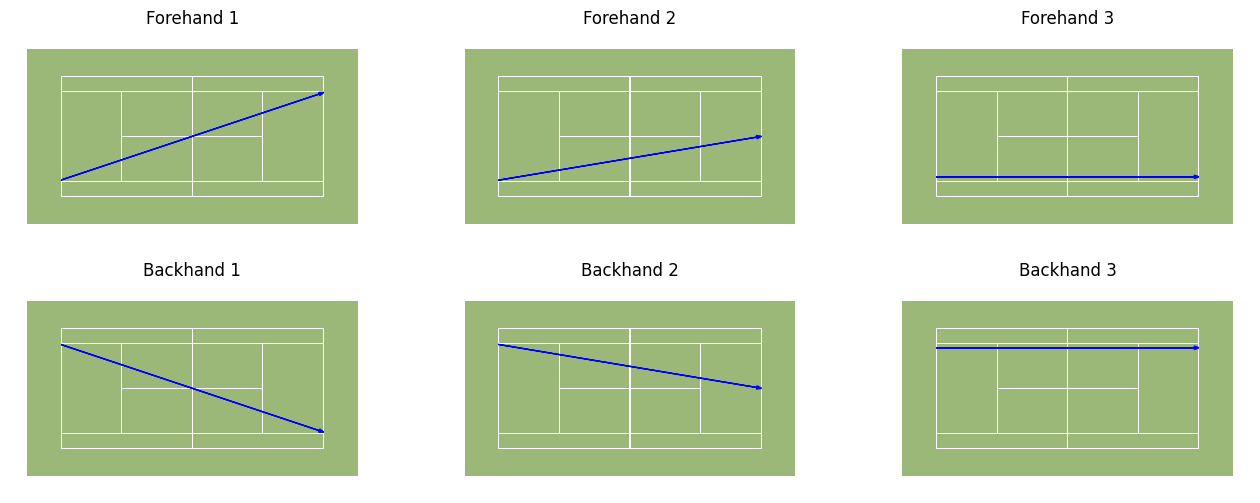

In [184]:
fig, ax = plt.subplots(figsize=(16,6),nrows=(2),ncols=(3))

ax[0][0].set_title('Forehand 1')
ax[0][1].set_title('Forehand 2')
ax[0][2].set_title('Forehand 3')
court.draw(ax=ax[0][0],display_range='full')
court.draw(ax=ax[0][1],display_range='full')
court.draw(ax=ax[0][2],display_range='full')
court.arrow(ax=ax[0][0],x1= -39.0, y1= -13.0, x2=39.0, y2=13.0,color= 'blue')
court.arrow(ax=ax[0][1],x1= -39.0, y1= -13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[0][2],x1= -39.0, y1= -12.0, x2=39.0, y2=-12.0,color= 'blue')

ax[1][0].set_title('Backhand 1')
ax[1][1].set_title('Backhand 2')
ax[1][2].set_title('Backhand 3')
court.draw(ax=ax[1][0],display_range='full')
court.draw(ax=ax[1][1],display_range='full')
court.draw(ax=ax[1][2],display_range='full')
court.arrow(ax=ax[1][0],x1= -39.0, y1= 13.0, x2=39.0, y2=-13.0,color= 'blue')
court.arrow(ax=ax[1][1],x1= -39.0, y1= 13.0, x2=39.0, y2=0,color= 'blue')
court.arrow(ax=ax[1][2],x1= -39.0, y1= 12.0, x2=39.0, y2=12.0,color= 'blue')

axes = ax.ravel()

plt.show()

In [217]:
import matplotlib.animation as animation

In [226]:
arrow_data = [
    # Row 0 arrows
    (-39.0, -13.0, 39.0, 13.0, 'blue'),
    (-39.0, -13.0, 39.0, 0.0, 'blue'),
    (-39.0, -12.0, 39.0, -12.0, 'blue'),
    
    # Row 1 arrows
    (-39.0, 13.0, 39.0, -13.0, 'blue'),
    (-39.0, 13.0, 39.0, 0.0, 'blue'),
    (-39.0, 12.0, 39.0, 12.0, 'blue'),
]

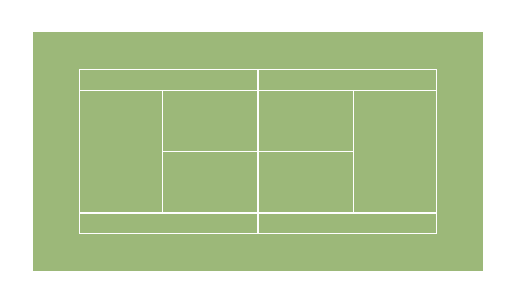

In [ ]:
fig, ax = plt.subplots()

court.draw(ax=ax,display_range='full')
def animate(i):

    for j in range(arrow_data)
    x1,x2,y1,y2,color = arrow_data[j]

    return court.arrow(ax=ax,x1= x1, y1= y1, x2=x2, y2=y2,color= color)
    

ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=1000,
    repeat_delay=100,
)

plt.show()

In [82]:
import pandas as pd
from pymining import itemmining, seqmining

In [83]:
Rallys = []
for _,row in FedererServePointsGameW.iterrows():
            
    if(row['2nd'] == 'False'):
        Rallys.append(row['1st'])
    else:
        Rallys.append(row['2nd'])

In [84]:
save = [RallyParsing(d,StrokesDictionary) for d in Rallys]